<a href="https://colab.research.google.com/github/samarth2015/srip_selection/blob/main/CNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Importing Libraries and downloading the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget "https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip"

--2025-02-19 18:10:54--  https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘human+activity+recognition+using+smartphones.zip.1’

human+activity+reco     [                 <=>]  58.18M  17.8MB/s    in 4.2s    

2025-02-19 18:10:59 (13.8 MB/s) - ‘human+activity+recognition+using+smartphones.zip.1’ saved [61005872]



In [ ]:
# unzip the HAR file
!unzip "/content/human+activity+recognition+using+smartphones.zip"

Archive:  /content/human+activity+recognition+using+smartphones.zip
replace UCI HAR Dataset.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: UCI HAR Dataset.names   
replace UCI HAR Dataset.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: UCI HAR Dataset.zip     


In [ ]:
!unzip "/content/UCI HAR Dataset.zip"

Archive:  /content/UCI HAR Dataset.zip
replace UCI HAR Dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: UCI HAR Dataset/.DS_Store  
replace __MACOSX/UCI HAR Dataset/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
replace UCI HAR Dataset/activity_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: UCI HAR Dataset/activity_labels.txt  
replace __MACOSX/UCI HAR Dataset/._activity_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
replace UCI HAR Dataset/features.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace UCI HAR Dataset/features.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Loading the data

#### Loading the train data into separate variables

In [ ]:
acc_x_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt', dtype=np.float32, delimiter=None)

acc_y_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_y_train.txt', dtype=np.float32, delimiter=None)

acc_z_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_acc_z_train.txt', dtype=np.float32, delimiter=None)

gyro_x_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_gyro_x_train.txt', dtype=np.float32, delimiter=None)

gyro_y_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_gyro_y_train.txt', dtype=np.float32, delimiter=None)

gyro_z_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/body_gyro_z_train.txt', dtype=np.float32, delimiter=None)

totalacc_x_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', dtype=np.float32, delimiter=None)

totalacc_y_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/total_acc_y_train.txt', dtype=np.float32, delimiter=None)

totalacc_z_train = np.genfromtxt('/content/UCI HAR Dataset/train/Inertial Signals/total_acc_z_train.txt', dtype=np.float32, delimiter=None)

In [ ]:
acc_x_train.shape, acc_y_train.shape, acc_z_train.shape, gyro_x_train.shape, gyro_y_train.shape, gyro_z_train.shape, totalacc_x_train.shape, totalacc_y_train.shape, totalacc_z_train.shape

((7352, 128),
 (7352, 128),
 (7352, 128),
 (7352, 128),
 (7352, 128),
 (7352, 128),
 (7352, 128),
 (7352, 128),
 (7352, 128))

In [ ]:
labels = np.genfromtxt('/content/UCI HAR Dataset/train/y_train.txt', dtype=np.int32, delimiter=None)

labels.shape

(7352,)

#### Loading the test data into separate variables

In [ ]:
acc_x_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt", dtype=np.float32, delimiter=None)

acc_y_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/body_acc_y_test.txt", dtype=np.float32, delimiter=None)

acc_z_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/body_acc_z_test.txt", dtype=np.float32, delimiter=None)

gyro_x_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/body_gyro_x_test.txt", dtype=np.float32, delimiter=None)

gyro_y_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/body_gyro_y_test.txt", dtype=np.float32, delimiter=None)

gyro_z_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/body_gyro_z_test.txt", dtype=np.float32, delimiter=None)

totalacc_x_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt", dtype=np.float32, delimiter=None)

totalacc_y_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/total_acc_y_test.txt", dtype=np.float32, delimiter=None)

totalacc_z_test = np.genfromtxt("/content/UCI HAR Dataset/test/Inertial Signals/total_acc_z_test.txt", dtype=np.float32, delimiter=None)

In [ ]:
labels_test = np.genfromtxt("/content/UCI HAR Dataset/test/y_test.txt", dtype=np.int32, delimiter=None)
labels_test.shape

(2947,)

## Creating features for LSTM model.

LSTM model is designed to handle the sequential data. Its important feature is that it has memory cells, which helps to retain the information and manipulate it.

So we will create some features which can be used by the LSTM model including the raw inertial signals.

In [ ]:
total_acceleration = np.sqrt(np.square(acc_x_train) + np.square(acc_y_train) + np.square(acc_z_train))
total_gyro = np.sqrt(np.square(gyro_x_train) + np.square(gyro_y_train) + np.square(gyro_z_train))

total_acceleration.shape, total_gyro.shape

((7352, 128), (7352, 128))

In [ ]:
total_acceleration_test = np.sqrt(np.square(acc_x_test) + np.square(acc_y_test) + np.square(acc_z_test))
total_gyro_test = np.sqrt(np.square(gyro_x_test) + np.square(gyro_y_test) + np.square(gyro_z_test))

total_acceleration_test.shape, total_gyro_test.shape

((2947, 128), (2947, 128))

## Training the LSTM model on features created by raw inertial data

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
class HAR_Dataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


In [ ]:
# torch.nn.LSTM takes input as 3D tensor, which has three components sequence_length, batch_size, input_size.
# Our sequence length is 7352 i.e. total instances of data.
# batch size will be given later
# input size will be 6 raw signals

X_train = np.stack((acc_x_train, acc_y_train, acc_z_train, gyro_x_train, gyro_y_train, gyro_z_train), axis=2)
X_test = np.stack((acc_x_test, acc_y_test, acc_z_test, gyro_x_test, gyro_y_test, gyro_z_test), axis=2)

X_train.shape, X_test.shape

((7352, 128, 6), (2947, 128, 6))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)


In [ ]:
# LSTM by torch expects data from [0, 5] instead of [1, 6] which was in the original dataset corresponding to 6 activites
labels = labels - 1
np.unique(labels)


array([0, 1, 2, 3, 4, 5], dtype=int32)

In [ ]:
labels_test = labels_test - 1
np.unique(labels_test)

array([0, 1, 2, 3, 4, 5], dtype=int32)

### Model 1 for the raw inertial signals

In [ ]:
batch_size = 16
dataset = HAR_Dataset(X_train, labels)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
input_size = 6
hidden_size = 32
num_layers = 3
num_classes = len(np.unique(labels))
learning_rate = 0.00001
num_epochs = 100

model = LSTMModel(input_size, hidden_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



Epoch [1/100], Loss: 1.7491
Epoch [2/100], Loss: 1.7827
Epoch [3/100], Loss: 1.7571
Epoch [4/100], Loss: 1.8415
Epoch [5/100], Loss: 1.7709
Epoch [6/100], Loss: 1.8286
Epoch [7/100], Loss: 1.8038
Epoch [8/100], Loss: 1.8109
Epoch [9/100], Loss: 1.7276
Epoch [10/100], Loss: 1.7638
Epoch [11/100], Loss: 1.8005
Epoch [12/100], Loss: 1.7911
Epoch [13/100], Loss: 1.7921
Epoch [14/100], Loss: 1.8206
Epoch [15/100], Loss: 1.8086
Epoch [16/100], Loss: 1.7933
Epoch [17/100], Loss: 1.8140
Epoch [18/100], Loss: 1.7736
Epoch [19/100], Loss: 1.6572
Epoch [20/100], Loss: 1.6416
Epoch [21/100], Loss: 1.7310
Epoch [22/100], Loss: 1.7028
Epoch [23/100], Loss: 1.5118
Epoch [24/100], Loss: 1.3914
Epoch [25/100], Loss: 1.3347
Epoch [26/100], Loss: 1.2817
Epoch [27/100], Loss: 1.3760
Epoch [28/100], Loss: 1.3458
Epoch [29/100], Loss: 1.2326
Epoch [30/100], Loss: 1.1961
Epoch [31/100], Loss: 1.2242
Epoch [32/100], Loss: 1.1842
Epoch [33/100], Loss: 1.3204
Epoch [34/100], Loss: 1.1123
Epoch [35/100], Loss: 1

In [ ]:
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    predicted = predicted.cpu().numpy()
    accuracy = np.mean(predicted == labels_test)
    print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.4041


### Model 2 for the features created by us

In [ ]:
X_train_new_features = np.stack((total_acceleration, total_gyro), axis=2)
X_test_new_features = np.stack((total_acceleration_test, total_gyro_test), axis=2)


dataset_new_features = HAR_Dataset(X_train_new_features, labels)
dataloader_new_features = DataLoader(dataset_new_features, batch_size=batch_size, shuffle=True)

input_size = 2
hidden_size = 64
num_layers = 3
num_classes = len(np.unique(labels))
learning_rate = 0.0001
num_epochs = 50

model_new_features = LSTMModel(input_size, hidden_size, num_layers, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_new_features.parameters(), lr=learning_rate)



In [ ]:
for epoch in range(num_epochs):
    for inputs, targets in dataloader_new_features:
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model_new_features(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/50], Loss: 1.0842
Epoch [2/50], Loss: 1.1244
Epoch [3/50], Loss: 1.1272
Epoch [4/50], Loss: 1.0440
Epoch [5/50], Loss: 1.0609
Epoch [6/50], Loss: 1.1292
Epoch [7/50], Loss: 1.0577
Epoch [8/50], Loss: 1.0445
Epoch [9/50], Loss: 1.1299
Epoch [10/50], Loss: 1.0193
Epoch [11/50], Loss: 1.1643
Epoch [12/50], Loss: 1.0630
Epoch [13/50], Loss: 1.1959
Epoch [14/50], Loss: 1.0462
Epoch [15/50], Loss: 1.1264
Epoch [16/50], Loss: 1.0531
Epoch [17/50], Loss: 1.1048
Epoch [18/50], Loss: 1.1288
Epoch [19/50], Loss: 1.0376
Epoch [20/50], Loss: 0.9940
Epoch [21/50], Loss: 1.1520
Epoch [22/50], Loss: 1.1065
Epoch [23/50], Loss: 1.0016
Epoch [24/50], Loss: 1.0259
Epoch [25/50], Loss: 1.1577
Epoch [26/50], Loss: 0.9374
Epoch [27/50], Loss: 1.0026
Epoch [28/50], Loss: 1.0929
Epoch [29/50], Loss: 1.1672
Epoch [30/50], Loss: 0.9605
Epoch [31/50], Loss: 1.2134
Epoch [32/50], Loss: 1.0154
Epoch [33/50], Loss: 1.0742
Epoch [34/50], Loss: 1.1455
Epoch [35/50], Loss: 0.7975
Epoch [36/50], Loss: 0.8946
E

In [ ]:
X_test_new_features = torch.tensor(X_test_new_features, dtype=torch.float32).to(device)

In [ ]:
model_new_features.eval()
with torch.no_grad():
    outputs = model_new_features(X_test_new_features)
    _, predicted = torch.max(outputs.data, 1)
    predicted = predicted.cpu().numpy()
    accuracy = np.mean(predicted == labels_test)
    print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.4150


## CNN-LSTM model

This model will begin with a 1D convolutional layer  with 64 filters and a kernel size of 3, followed by a max-pooling layer and flattening. To maintain the temporal structure of the data, all convolutional layers will be wrapped in a TimeDistributed layer, which takes reshaped input signals (from (None, 128, 9) to (None, 4, 32, 9)). The extracted features will then be passed to an LSTM layer with 128 units to capture temporal dependencies, followed by a fully connected layer with a softmax activation for 6-class classification.


The two models trained below are inspired from the paper **A CNN-LSTM Approach to Human Activity Recognition** by **Ronald Mutegeki** and **Dong Seog Han**.

#### Data Preparation

In [ ]:
X_train = np.stack((acc_x_train, acc_y_train, acc_z_train, gyro_x_train, gyro_y_train, gyro_z_train, totalacc_x_train, totalacc_y_train, totalacc_z_train), axis=2)
X_test = np.stack((acc_x_test, acc_y_test, acc_z_test, gyro_x_test, gyro_y_test, gyro_z_test, totalacc_x_test, totalacc_y_test, totalacc_z_test), axis=2)

X_train.shape, X_test.shape

((7352, 128, 9), (2947, 128, 9))

In [ ]:
X_train = X_train.reshape(-1, 4, 32, 9)
X_train.shape

(7352, 4, 32, 9)

In [ ]:
X_train.shape

(7352, 4, 32, 9)

In [ ]:
X_test = X_test.reshape(-1, 4, 32, 9)
X_test.shape

(2947, 4, 32, 9)

#### Building the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),

        TimeDistributed(Conv1D(64, 3, activation='relu')),
        TimeDistributed(MaxPooling1D(2)),
        TimeDistributed(Flatten()),

        LSTM(128, activation='tanh'),

        Dense(num_classes, activation='softmax')
    ])

    return model

model = create_model(input_shape=(4, 32, 9), num_classes=6)


In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_12                  │ (None, 4, 30, 64)           │           1,792 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_13                  │ (None, 4, 15, 64)           │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_14                  │ (None, 4, 960)              │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 128)                 │         557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,134 (2.14 MB)

 Trainable params: 560,134 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

#### Training and Testing the model

In [ ]:
history = model.fit(
    X_train,
    labels,
    batch_size=32,
    epochs=50,
    validation_split=0.2
)

Epoch 1/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5239 - loss: 1.3218 - val_accuracy: 0.7369 - val_loss: 0.6760
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8132 - loss: 0.4836 - val_accuracy: 0.7954 - val_loss: 0.5543
Epoch 3/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8874 - loss: 0.3339 - val_accuracy: 0.8681 - val_loss: 0.4560
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9056 - loss: 0.2583 - val_accuracy: 0.8817 - val_loss: 0.4242
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9303 - loss: 0.1976 - val_accuracy: 0.8756 - val_loss: 0.4206
Epoch 6/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9401 - loss: 0.1682 - val_accuracy: 0.8872 - val_loss: 0.4006
Epoch 7/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9479 - loss: 0.1439 - val_accuracy: 0.8960 - val_loss: 0.3849
Epoch 8/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9509 - loss: 0.1336 - val_accuracy: 0

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

def get_metrics(model, X_test, labels_test):
    #send X_test in reshaped format
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)


    metrics = {
        'Accuracy': accuracy_score(labels_test, y_pred),
        'Precision': precision_score(labels_test, y_pred, average='weighted'),
        'Recall': recall_score(labels_test, y_pred, average='weighted'),
        'F1 Score': f1_score(labels_test, y_pred, average='weighted')
    }

    print("\nPerformance Metrics:")
    for name, value in metrics.items():
        print(f"{name+':':<10} {value:.4f}")

    cm = confusion_matrix(labels_test, y_pred)
    plt.figure(figsize=(8, 6))


    class_labels = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return y_pred, accuracy_score(labels_test, y_pred), f1_score(labels_test, y_pred, average='weighted')

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Performance Metrics:
Accuracy:  0.9036
Precision: 0.9064
Recall:    0.9036
F1 Score:  0.9041


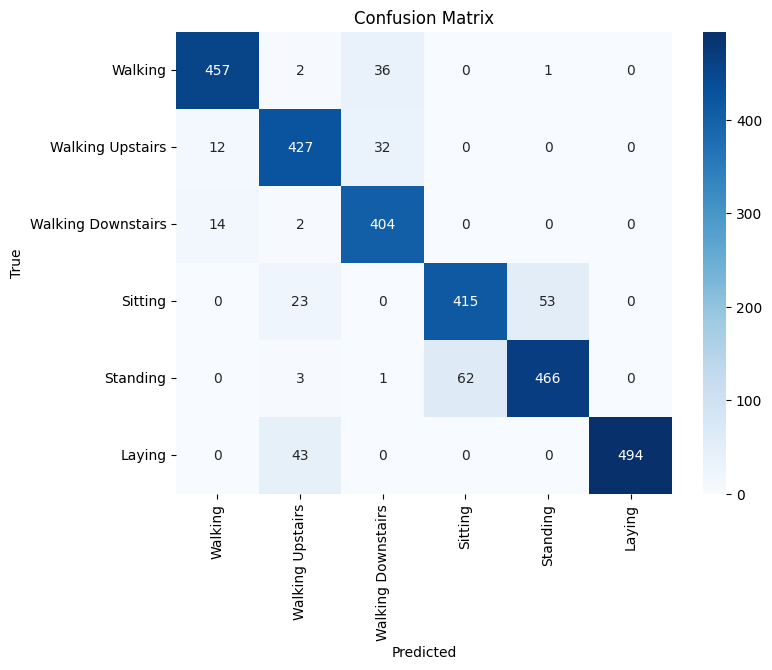

In [ ]:
CNN_LSTM_predictions = get_metrics(model, X_test, labels_test)

#### Building another model CNN_LSTM_Dense

Here we are going to add some more layer just before the softmax output layer. One layer will contain 64 neurons and another of 32 neurons.

In [ ]:
def create_model_dense(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),

        TimeDistributed(Conv1D(64, 3, activation='relu')),
        TimeDistributed(MaxPooling1D(2)),
        TimeDistributed(Flatten()),

        LSTM(128, activation='tanh'),

        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    return model

model2 = create_model_dense(input_shape=(4, 32, 9), num_classes=6)

In [ ]:
model2.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_12                  │ (None, 4, 30, 64)           │           1,792 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_13                  │ (None, 4, 15, 64)           │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_14                  │ (None, 4, 960)              │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 128)                 │         557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,680,404 (6.41 MB)

 Trainable params: 560,134 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,120,270 (4.27 MB)

In [ ]:
model2.fit(
    X_train,
    labels,
    batch_size=64,
    epochs=50,
    validation_split=0.2
)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3585 - loss: 1.6308 - val_accuracy: 0.6642 - val_loss: 1.0353
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7555 - loss: 0.8295 - val_accuracy: 0.7845 - val_loss: 0.6566
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8325 - loss: 0.4807 - val_accuracy: 0.8171 - val_loss: 0.5736
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8640 - loss: 0.3790 - val_accuracy: 0.8273 - val_loss: 0.5556
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8897 - loss: 0.3144 - val_accuracy: 0.8640 - val_loss: 0.4977
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9118 - loss: 0.2669 - val_accuracy: 0.8681 - val_loss: 0.4946
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9300 - loss: 0.2105 - val_accuracy: 0.8790 - val_loss: 0.4782
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9341 - loss: 0.1968 - val_accuracy: 0.8912 - val_los

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Performance Metrics:
Accuracy:  0.8826
Precision: 0.8876
Recall:    0.8826
F1 Score:  0.8835


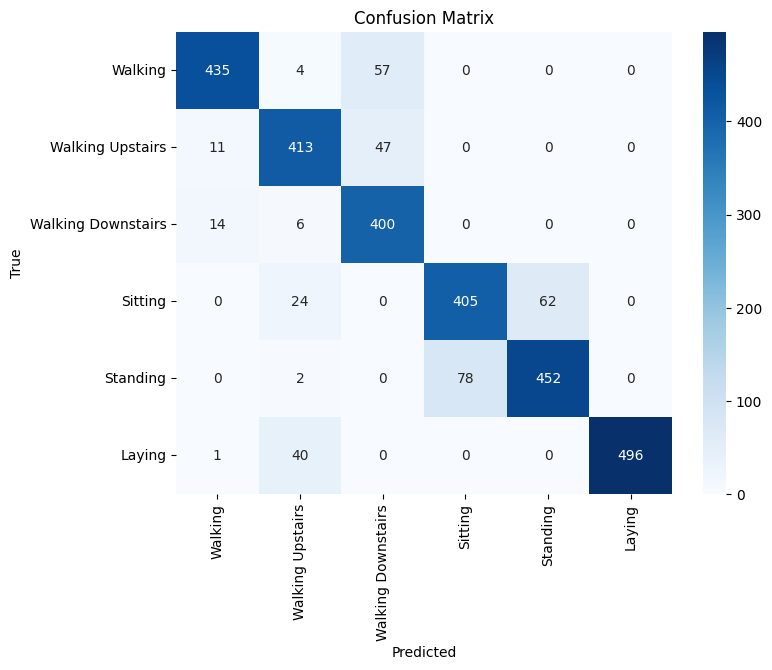

In [ ]:
CNN_LSTM_dense_predictions = get_metrics(model2, X_test, labels_test)

## CNN_LSTM Model using the custom features.

Above we have created 2 time varying features i.e. total acceleration and total gyro. Now I will add some more features like acceleration sma and gyro sma which is signal magnitude area i.e. sum of absolute values of acceleration and gyro.

In [ ]:
acceleration_sma = np.abs(acc_x_train) + np.abs(acc_y_train) + np.abs(acc_z_train)
gyro_sma = np.abs(gyro_x_train) + np.abs(gyro_y_train) + np.abs(gyro_z_train)

acceleration_sma.shape, gyro_sma.shape

((7352, 128), (7352, 128))

In [ ]:
acceleration_sma_test = np.abs(acc_x_test) + np.abs(acc_y_test) + np.abs(acc_z_test)
gyro_sma_test = np.abs(gyro_x_test) + np.abs(gyro_y_test) + np.abs(gyro_z_test)

acceleration_sma_test.shape, gyro_sma_test.shape

((2947, 128), (2947, 128))

In [ ]:
X_train = np.stack((acc_x_train, acc_y_train, acc_z_train, gyro_x_train, gyro_y_train, gyro_z_train, totalacc_x_train, totalacc_y_train, totalacc_z_train, total_acceleration, total_gyro, acceleration_sma, gyro_sma), axis=2)
X_test = np.stack((acc_x_test, acc_y_test, acc_z_test, gyro_x_test, gyro_y_test, gyro_z_test, totalacc_x_test, totalacc_y_test, totalacc_z_test, total_acceleration_test, total_gyro_test, acceleration_sma_test, gyro_sma_test), axis=2)

X_train.shape, X_test.shape


((7352, 128, 13), (2947, 128, 13))

In [ ]:
X_train = X_train.reshape(-1, 4, 32, 13)
X_test = X_test.reshape(-1, 4, 32, 13)

In [ ]:
model_custom =create_model_dense(input_shape=(4, 32, 13), num_classes=6)
model_custom.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model_custom.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_18                  │ (None, 4, 30, 64)           │           2,560 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_19                  │ (None, 4, 15, 64)           │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_20                  │ (None, 4, 960)              │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 128)                 │         557,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,662 (2.18 MB)

 Trainable params: 570,662 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_custom.fit(
    X_train,
    labels,
    batch_size=32,
    epochs=50,
    validation_split=0.2
)

Epoch 1/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5587 - loss: 1.2545 - val_accuracy: 0.7750 - val_loss: 0.5962
Epoch 2/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8194 - loss: 0.4504 - val_accuracy: 0.8226 - val_loss: 0.4974
Epoch 3/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8735 - loss: 0.3291 - val_accuracy: 0.8498 - val_loss: 0.4213
Epoch 4/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8910 - loss: 0.2726 - val_accuracy: 0.8885 - val_loss: 0.3664
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9129 - loss: 0.2224 - val_accuracy: 0.8973 - val_loss: 0.3323
Epoch 6/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9340 - loss: 0.1703 - val_accuracy: 0.9075 - val_loss: 0.3059
Epoch 7/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9455 - loss: 0.1514 - val_accuracy: 0.9001 - val_loss: 0.3175
Epoch 8/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9463 - loss: 0.1345 - val_accuracy: 0

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Performance Metrics:
Accuracy:  0.9111
Precision: 0.9128
Recall:    0.9111
F1 Score:  0.9111


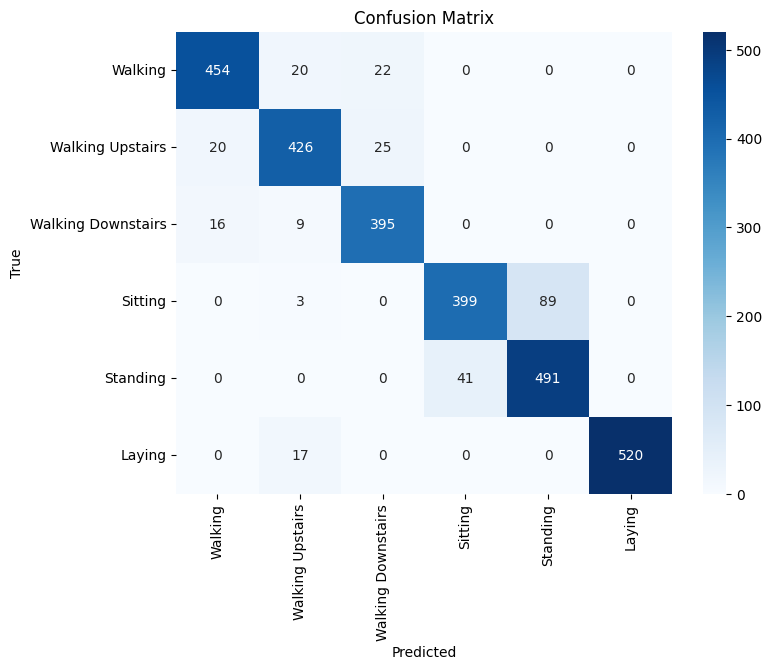

In [ ]:
CNN_LSTM_dense_custom_predictions = get_metrics(model_custom, X_test, labels_test)

## Results by the three CNN_LSTM models and Observations of this overall notebook


### Accuracy Graphs for CNN_LSTM models

In [ ]:
y_preds = [CNN_LSTM_predictions[0], CNN_LSTM_dense_predictions[0], CNN_LSTM_dense_custom_predictions[0]]
accuracies = [ CNN_LSTM_predictions[1], CNN_LSTM_dense_predictions[1], CNN_LSTM_dense_custom_predictions[1]]
f1_scores = [CNN_LSTM_predictions[2], CNN_LSTM_dense_predictions[2], CNN_LSTM_dense_custom_predictions[2]]

In [ ]:
type(CNN_LSTM_dense_custom_predictions[0])

numpy.ndarray

In [ ]:
uniques = np.unique(labels_test)

# making a dict to store the accuracy per activity for each model
accuracy_per_activity = {model: [] for model in ["CNN-LSTM", "CNN-LSTM-Dense", "CNN-LSTM-Dense-Custom"]}

for activity in uniques:
    mask = labels_test == activity
    #this mask is just a true false value where the test_labels matches certain activity
    for i, model in enumerate(["CNN-LSTM", "CNN-LSTM-Dense", "CNN-LSTM-Dense-Custom"]):
        accuracy = accuracy_score(labels_test[mask], y_preds[i][mask])
        accuracy_per_activity[model].append(accuracy)


accuracy_per_activity_model1 = accuracy_per_activity["CNN-LSTM"]
accuracy_per_activity_model2 = accuracy_per_activity["CNN-LSTM-Dense"]
accuracy_per_activity_model3 = accuracy_per_activity["CNN-LSTM-Dense-Custom"]

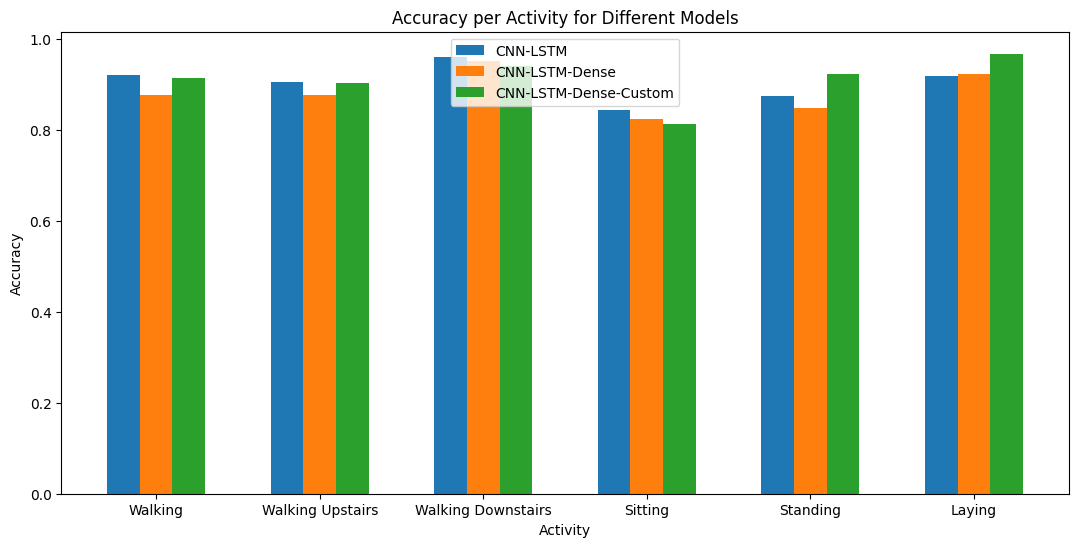

In [ ]:
x = np.arange(len(uniques))
width = 0.2

fig, ax = plt.subplots(figsize=(13, 6))
ax.bar(x - width, accuracy_per_activity_model1, width, label='CNN-LSTM')
ax.bar(x, accuracy_per_activity_model2, width, label='CNN-LSTM-Dense')
ax.bar(x + width, accuracy_per_activity_model3, width, label='CNN-LSTM-Dense-Custom')

ax.set_xlabel("Activity")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy per Activity for Different Models")
ax.set_xticks(x)
ax.set_xticklabels(['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying'])
ax.legend()
plt.show()


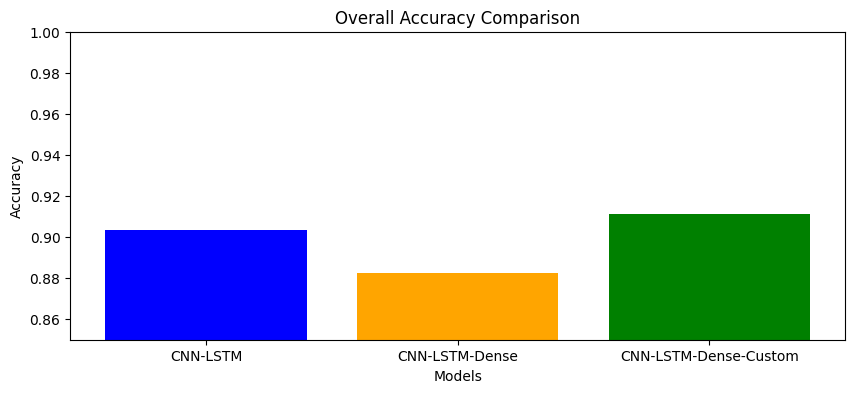

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(["CNN-LSTM", "CNN-LSTM-Dense", "CNN-LSTM-Dense-Custom"], accuracies, color=['blue', 'orange', 'green'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Overall Accuracy Comparison")
plt.ylim(0.85, 1.0)
plt.show()


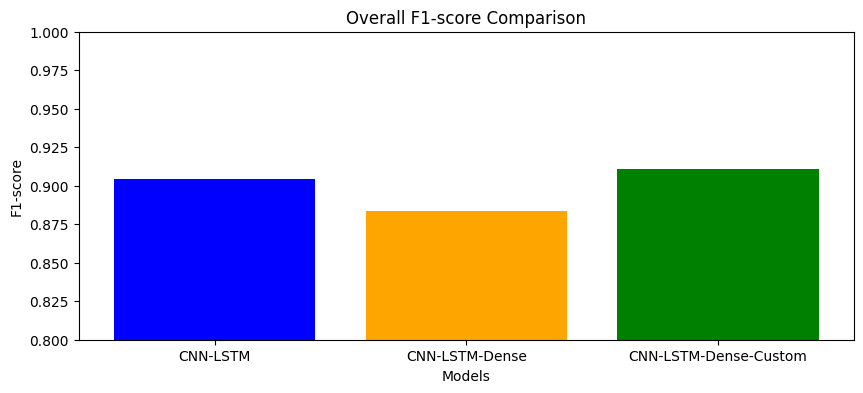

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(["CNN-LSTM", "CNN-LSTM-Dense", "CNN-LSTM-Dense-Custom"], f1_scores, color=['blue', 'orange', 'green'])
plt.xlabel("Models")
plt.ylabel("F1-score")
plt.title("Overall F1-score Comparison")
plt.ylim(0.8, 1.0)
plt.show()

### Observations

### **Observations**

When using raw inertial signals directly with an LSTM model, the accuracy was **~40%**. Even though we added two more custom features of total acceleration and total gyro accuracy went upto **~41%** but this isn't the significant change.

When using a **1D CNN** followed by **LSTM** and a Dense layer with 50 neurons, the accuracy improved to **~90%**.

The reasons for these changes are discussed below.

---


### **Reasons**
#### **LSTM on Raw Inertial Data (~40% Accuracy)**

- LSTMs are good at capturing temporal dependencies but struggle when the raw input lacks extracted features.
- Directly feeding raw sensor data without preprocessing forces LSTM to learn both feature extraction and temporal dependencies, which is inefficient.

    
**Why Accuracy Was Low:**

- The model had to learn important features from scratch, making it harder to converge. No spatial (local) feature extraction was performed before sequence modeling. The lack of feature hierarchies led to poor generalization across activities.

---
#### **CNN + LSTM + Dense (~90% Accuracy)**
**Improvements Due to 1D CNN:**

- **Feature Extraction**: CNN helps in learning local patterns from inertial signals before LSTM processes the sequence.
- **Reduces Noise**: CNN filters irrelevant variations. They make it easier for LSTM to learn meaningful temporal relationships.
- **Spatial Awareness**: 1D CNN captures short-term dependencies effectively which LSTM can then model over time.


Once the CNN extracts meaningful features, LSTM can focus on learning long-term dependencies instead of struggling with raw data.
This leads to better sequence modeling and improved classification performance. Also we have added dense layer which helped in capturing complex feature relationships after LSTM processing. It acts as a fully connected decision-making layer, improving final classification performance.

